In [17]:
# Importing some libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
train = pd.read_csv('train.csv.csv')
test = pd.read_csv('test.csv.csv')

In [19]:
#Combining the train and test dataFrame to save time.
y = train['SalePrice'] # naming output(Saleprice) as another dataframe and will be joined 
                       # to original dataset later.
train.drop('SalePrice', axis=1, inplace=True)
df = pd.concat([train,test])
df = df.reset_index(drop=True)

In [20]:
# Formula to get missing values from the data.

n_missing = pd.DataFrame({'isnull':df.isnull().sum().sort_values(ascending=False).head(35), 
                 'percent':df.isnull().sum().sort_values(ascending=False).head(35)/len(df)*100})
n_missing

,isnull,percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


In [21]:
# Data points whose only 1 or 2 values are missing are filled using mode.

lst = ['BsmtHalfBath','Functional','Utilities','BsmtFullBath','Electrical','BsmtFinSF1','Exterior1st',
       'Exterior2nd','GarageCars','GarageArea','KitchenQual','SaleType','TotalBsmtSF','BsmtUnfSF',
       'BsmtFinSF2','ExterQual']
for i in lst:
    df[i].replace(np.nan, df[i].mode()[0], inplace=True)


In [22]:
# Filling none to some columns.

df['Alley'].fillna(value='no alley',inplace=True)
df['PoolQC'].fillna(value='No pool',inplace=True)
df['MiscFeature'].fillna(value='no feature',inplace=True)
df['Fence'].fillna(value='no fence',inplace=True)
df['FireplaceQu'].fillna(value='no fireplace',inplace=True)

In [23]:
# columns with no garge values.
gar_fill = ['GarageType','GarageCond','GarageFinish','GarageQual']

for i in gar_fill:
    df[i].replace(np.nan, 'no garage',inplace=True)

In [24]:
# Columns with no basements.

bsmt_fill = ['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']

for i in bsmt_fill:
    df[i].replace(np.nan, 'no bsmt',inplace=True)

In [25]:
df['GarageYrBlt'].fillna(value=0,inplace=True)
df['MasVnrArea'].fillna(value=0, inplace=True)
df['MasVnrType'].fillna(value='None',inplace=True)

# filling these two variables using mode.
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [26]:
# Checking the missing values.
df.isnull().sum().sum()

0

In [27]:
value_map = {'TA':5,'Gd':7,'Ex':9,'Fa':3,'no bsmt':0,'Po':2,'GLQ':1, 'ALQ':2, 'Unf':3, 'Rec':4,
             'BLQ':5, 'LwQ':6,'no fireplace':0,'no garage':0,'No pool':0,'no fence':0, 'MnPrv':3, 
             'GdWo':2, 'GdPrv':4, 'MnWw':1}

df['KitchenQual'] = df['KitchenQual'].map(value_map).astype('int')

df['BsmtCond'] = df['BsmtCond'].map(value_map).astype('int')
df['BsmtQual'] = df['BsmtQual'].map(value_map).astype('int')

df['BsmtFinType1'] = df['BsmtFinType1'].map(value_map).astype('int')
df['BsmtFinType2'] = df['BsmtFinType2'].map(value_map).astype('int')

df['FireplaceQu'] = df['FireplaceQu'].map(value_map).astype('int')

df['GarageCond'] = df['GarageCond'].map(value_map).astype('int')
df['GarageQual'] = df['GarageQual'].map(value_map).astype('int')

df['PoolQC'] = df['PoolQC'].map(value_map).astype('int')

df['Fence'] = df['Fence'].map(value_map).astype('int')

df['ExterCond'] = df['ExterCond'].map(value_map).astype('int')
df['ExterQual'] = df['ExterQual'].map(value_map).astype('int')
df['HeatingQC'] = df['HeatingQC'].map(value_map).astype('int')

In [28]:
# Getting only numeric data for plotting and getting better understanding of outliers.

numerical_data = df.select_dtypes(exclude =['object'])

# Creating a new dataFrame and joining y variable for pairplot.
train_graph = df.iloc[ :len(y), : ]
train_graph = train_graph.join(y)

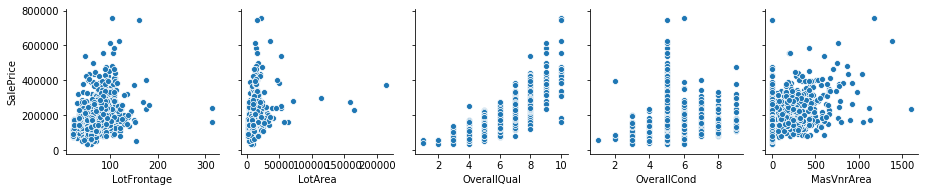

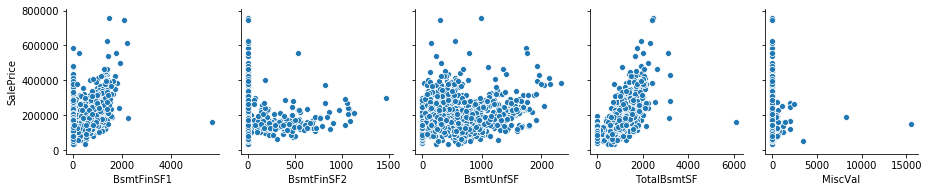

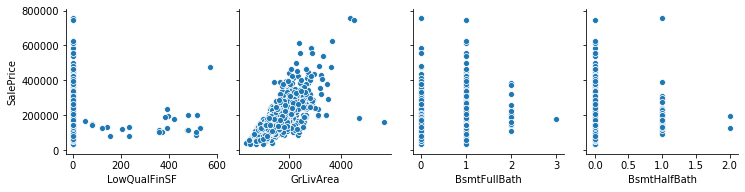

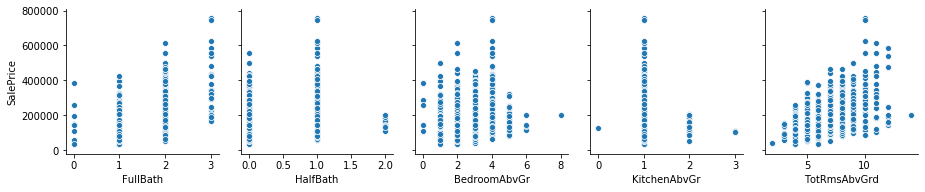

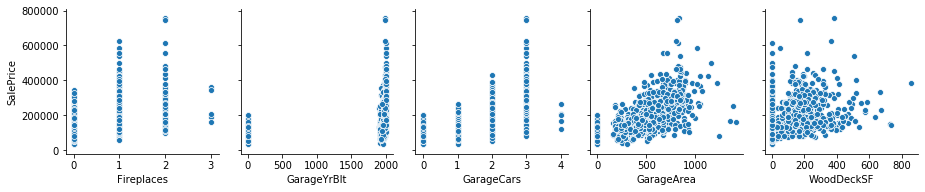

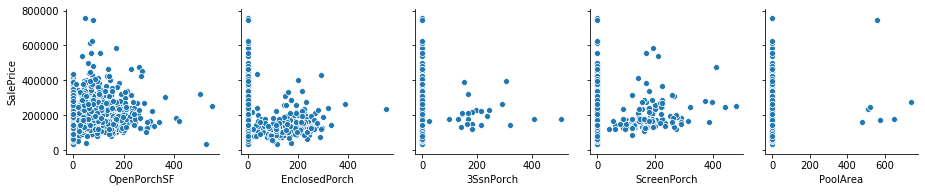

In [29]:
sns.pairplot(data=train_graph, y_vars=['SalePrice'], x_vars=['LotFrontage', 'LotArea', 'OverallQual','OverallCond','MasVnrArea'])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','MiscVal'])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'])

In [30]:

df = df.join(y)
# Dropping outliers manually using pairplot.

df = df.drop(df[(df['OverallCond']<0.8)&(df['SalePrice']>300000)].index)
df = df.drop(df[(df['OverallCond']>1)&(df['SalePrice']>700000)].index)
df = df.drop(df[(df['OverallQual']>9)&(df['SalePrice']<300000)].index)
df = df.drop(df[(df['MasVnrArea']<1)&(df['SalePrice']>700000)].index)
df = df.drop(df[(df['BsmtHalfBath']>0.5)&(df['SalePrice']>600000)].index)
df = df.drop(df[(df['PoolArea']>1.5)&(df['SalePrice']>600000)].index)

df.reset_index(drop=True,inplace=True)
y = df['SalePrice']
y.dropna(inplace=True)
df.drop('SalePrice',axis=1,inplace=True)

In [31]:
# Getting dummmy variables for the categorical data since machine cannot read text.

categorical_data = df.select_dtypes(include=['object'])

cat_dum = pd.get_dummies(categorical_data, drop_first=True)
df.drop(categorical_data.columns, axis=1, inplace=True)
df = pd.concat([df,cat_dum],axis=1)

In [32]:
# Seperating train and test datasets for Training the model.

train_df = df.iloc[ : len(y)]
test_df = df.iloc[len(y): ]

train_df = train_df.join(y)

In [33]:
from sklearn.model_selection import train_test_split

X = train_df.drop('SalePrice',axis=1)
y = train_df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
predictions = lr.predict(X_test)

In [37]:
from sklearn.metrics import r2_score

print(r2_score(y_test,predictions))

0.8913846918728217
